# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [230]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [160]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [163]:
#your code here
spaceship.dropna(inplace=True)
def transform_values(cabin):
    return cabin[0]
spaceship['Cabin']=spaceship['Cabin'].apply(transform_values)
spaceship.drop(['PassengerId','Name'],axis=1,inplace=True)

In [165]:
spaceship.Cabin.unique()

array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

In [167]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
other_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'] 

ohe = OneHotEncoder(sparse_output=False,)
ohe.fit(spaceship[categorical_cols])
categorical_cols_encoded = ohe.transform(spaceship[categorical_cols])
categorical_cols_encoded
new_cat_df = pd.DataFrame(categorical_cols_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=spaceship.index)
new_num_df=spaceship[other_cols]

new_spaceship_df=pd.concat([new_cat_df,new_num_df],axis=1)
new_spaceship_df

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,32.0,0.0,1049.0,0.0,353.0,3235.0,False


**Perform Train Test Split**

In [170]:
#your code here
X = new_spaceship_df.drop(columns=['Transported'])
y = new_spaceship_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [172]:
normalizer = MinMaxScaler()

In [174]:
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)
X_train.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7832,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,25.0,0.0,1673.0,0.0,642.0,612.0
5842,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,36.0,0.0,2624.0,1657.0,2799.0,1.0
3928,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0
4091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0
7679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0


In [176]:
X_train_norm

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.86504820e-02, 3.00944138e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.35232188e-01, 1.24910746e-01, 4.91738788e-05],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.13548733e-02, 1.98711644e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.70742592e-02, 6.84500393e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.04317310e-02, 1.47268833e-03, 9.83477577e-05]])

In [178]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7832,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.316456,0.0,0.056116,0.000000,0.028650,0.030094
5842,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.455696,0.0,0.088015,0.135232,0.124911,0.000049
3928,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.430380,0.0,0.000000,0.000000,0.000000,0.000000
4091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.468354,0.0,0.000000,0.000000,0.000000,0.000000
7679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.278481,0.0,0.000000,0.000000,0.000000,0.000000


In [180]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8441,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.367089,0.000000,0.000000,0.000000,0.000000,0.000000
8058,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.164557,0.000000,0.000000,0.000000,0.000000,0.000000
320,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.632911,0.000000,0.000000,0.000000,0.000000,0.000000
2548,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.075949,0.000000,0.000000,0.000000,0.000000,0.000000
8027,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.468354,0.024458,0.000101,0.049049,0.000045,0.003344


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [184]:
#your code here
bagging_clas = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100, # number of models to use
                               max_samples = 1000)

In [186]:
bagging_clas.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [197]:
y_pred_test_bag = bagging_clas.predict(X_test_norm)
accuracy_score(y_test, y_pred_test_bag)
confusion_matrix(y_test, y_pred_test_bag)
y_score2= bagging_clas.predict_proba(X_test_norm)
print(" Accuracy:", accuracy_score(y_test, y_pred_test_bag))
print("\n Classification Report:\n", classification_report(y_test, y_pred_test_bag))

 Accuracy: 0.8078668683812406

 Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.81      0.81       653
        True       0.81      0.80      0.81       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



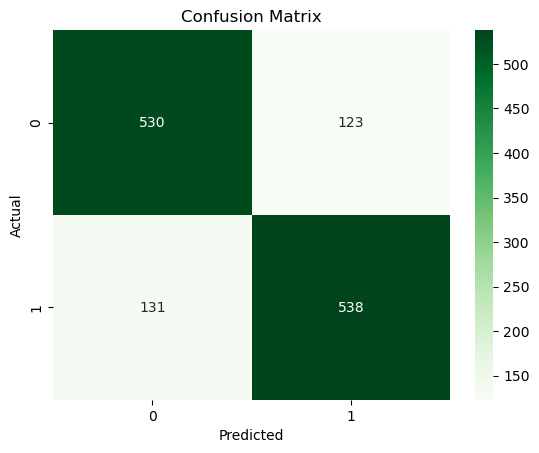

In [210]:
#Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_test_bag)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Random Forests

 Accuracy: 0.8086232980332829

 Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.82      0.81       653
        True       0.82      0.79      0.81       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



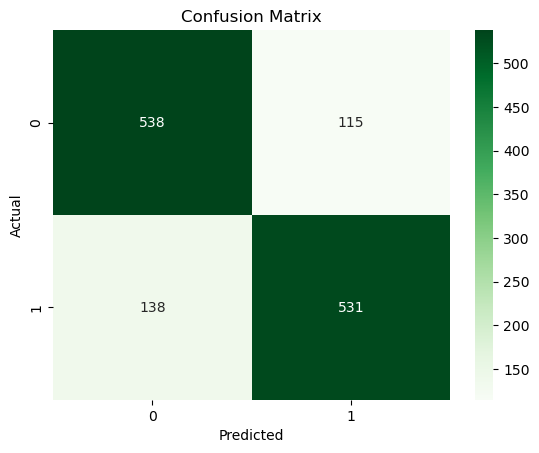

In [218]:
#your code here
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)
forest.fit(X_train_norm, y_train)
y_pred_test = forest.predict(X_test_norm)
accuracy_score(y_test, y_pred_test)
confusion_matrix(y_test, y_pred_test)

y_score2= forest.predict_proba(X_test_norm)
print(" Accuracy:", accuracy_score(y_test, y_pred_test))
print("\n Classification Report:\n", classification_report(y_test, y_pred_test))

#Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Gradient Boosting

 Accuracy: 0.8101361573373677

 Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.76      0.80       653
        True       0.78      0.86      0.82       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



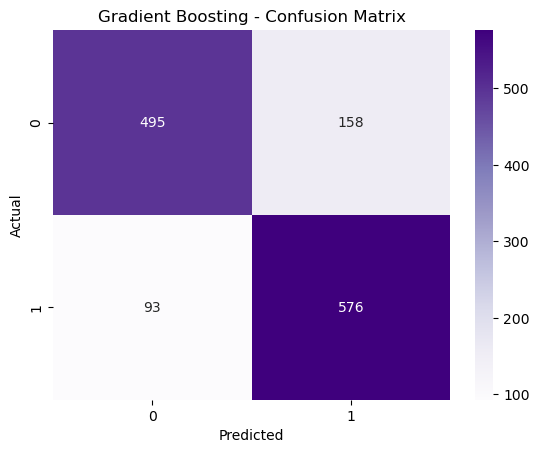

In [226]:
#your code here
# Create and train the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train_norm, y_train)

# Predict on test set
y_pred_test_gb = gb.predict(X_test_norm)

# Accuracy and classification report
print(" Accuracy:", accuracy_score(y_test, y_pred_test_gb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_test_gb))

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_test_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Adaptive Boosting

C:\Users\sheri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 Accuracy: 0.7972768532526475

 Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.76      0.79       653
        True       0.78      0.83      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



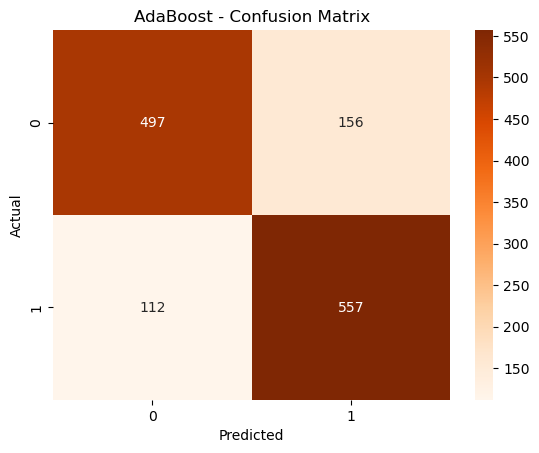

In [233]:
#your code here

# Create and train the AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_norm, y_train)

# Predict on test set
y_pred_test_ada = ada.predict(X_test_norm)

# Accuracy and classification report
print(" Accuracy:", accuracy_score(y_test, y_pred_test_ada))
print("\n Classification Report:\n", classification_report(y_test, y_pred_test_ada))

# Confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_test_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges')
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Which model is the best and why?

In [ ]:
#comment here
#Best Overall: Gradient Boosting
#Highest accuracy (0.8101)

#Best F1-score for the True class (0.82)

#Strong recall (0.86) for the True class

#Slight trade-off: lower recall for False (0.76)
